In [7]:
# In the section below we are importing libraries which will be used in the program below
# <numpy> to compute mean error for the predicted values
# <matplotlib.pyplot> to plot the error graph
# <pandas> to load and parse the csv file into meaningful dataframes
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
# In the section below we are loading training data csv file into dataframe named df_train.
df_train = pd.read_csv('zip.train.p.csv')
df_train.head()

,6.0000,-1.0000,-1.0000.1,-1.0000.2,-1.0000.3,-1.0000.4,-1.0000.5,-1.0000.6,-0.6310,0.8620,...,0.8230,1.0000.39,0.4820,-0.4740,-0.9910,-1.0000.121,-1.0000.122,-1.0000.123,-1.0000.124,Unnamed: 257
0,5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0,NaN
1,4.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0,NaN
2,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,NaN
3,3.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0,NaN
4,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.397,0.983,-0.535,-1.000,...,0.015,-0.862,-0.871,-0.437,-1.000,-1.000,-1.000,-1.000,-1.0,NaN


In [9]:
# In the section below we are separating attributes and labels for training data.  
X_train = df_train.iloc[:, 1:256].values
Y_train = df_train.iloc[:, 0].values

In [10]:
# In the section below we will use 10% of the training data as validation data.
from sklearn.model_selection import train_test_split
# split dataset into training and validation data
X_train, X_validation, Y_train, Y_validation = train_test_split(
    X_train, Y_train, test_size=0.1, random_state=1, stratify=Y_train)

In [26]:
# In the section below we are training and validating KNN classifier ...
# ... for different values of K (1 to 20).
from sklearn.neighbors import KNeighborsClassifier
error = []
min_error = 1
best_knn = KNeighborsClassifier(n_neighbors=0)
# find the best classifier for k = {1:20} based on minimum mean error.
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    # training the model
    knn.fit(X_train, Y_train)
    # predicting the label using test data
    y_pred = knn.predict(X_validation)
    error_i = np.mean(y_pred != Y_validation)
    error.append(error_i)
    if(error_i < min_error):
        print('best k =',i,' with min_error =',error_i)
        min_error = error_i
        best_knn = knn

best k= 1  with min_error= 0.0205761316872428


Text(0, 0.5, 'Mean Error')

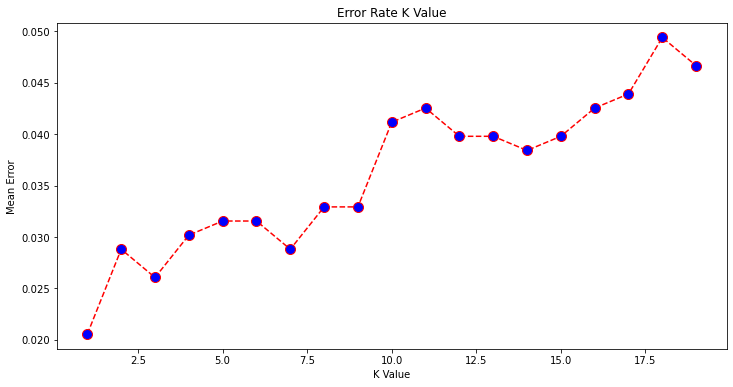

In [24]:
# In the section below we are plotting to visualize mean error agaist different values of K.
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [19]:
# In the section below we are loading test data csv file into dataframe named df_test.
df_test = pd.read_csv('zip.test.p.csv')
print(df_test.head())

   9   -1  -1.1  -1.2   -1.3  -1.4  -0.948  -0.561  0.148  0.384  ...  -1.136  \
0  6 -1.0  -1.0  -1.0 -1.000  -1.0    -1.0  -1.000 -1.000 -1.000  ...  -1.000   
1  3 -1.0  -1.0  -1.0 -0.593   0.7     1.0   1.000  1.000  1.000  ...   1.000   
2  6 -1.0  -1.0  -1.0 -1.000  -1.0    -1.0  -1.000 -1.000 -1.000  ...  -1.000   
3  6 -1.0  -1.0  -1.0 -1.000  -1.0    -1.0  -1.000 -0.858 -0.106  ...   0.901   
4  0 -1.0  -1.0  -1.0 -1.000  -1.0    -1.0   0.195  1.000  0.054  ...   0.224   

   -0.908   0.43  0.622  -0.973  -1.137  -1.138  -1.139  -1.140  -1.141  
0  -1.000 -1.000 -1.000  -1.000  -1.000  -1.000    -1.0    -1.0    -1.0  
1   0.717  0.333  0.162  -0.393  -1.000  -1.000    -1.0    -1.0    -1.0  
2  -1.000 -1.000 -1.000  -1.000  -1.000  -1.000    -1.0    -1.0    -1.0  
3   0.901  0.901  0.290  -0.369  -0.867  -1.000    -1.0    -1.0    -1.0  
4   1.000  0.988  0.187   0.139  -0.641  -0.812    -1.0    -1.0    -1.0  

[5 rows x 257 columns]


In [20]:
# In the section below we are separating attributes and labels for test data.
X_test = df_test.iloc[:, 1:256].values
Y_test = df_test.iloc[:, 0].values

In [21]:
# let's predict the labels using the best model
Y_pred = best_knn.predict(X_test)

In [27]:
# Print out classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       359
           1       0.98      0.97      0.97       264
           2       0.94      0.92      0.93       198
           3       0.93      0.92      0.92       166
           4       0.92      0.90      0.91       200
           5       0.93      0.91      0.92       160
           6       0.96      0.96      0.96       170
           7       0.92      0.94      0.93       147
           8       0.95      0.89      0.92       166
           9       0.89      0.95      0.92       176

    accuracy                           0.94      2006
   macro avg       0.94      0.94      0.94      2006
weighted avg       0.94      0.94      0.94      2006

